# Exercise 1

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
import string

punctuation = string.punctuation + '\n'

with open('./data/Europe_Covid.txt', 'r') as text_file:
    europe_covid_text = text_file.read()
    
data = []

for sentence in sent_tokenize(europe_covid_text):
    temp = []
    
    cleaned_sentence = sentence.translate(str.maketrans('', '', punctuation)).lower()
    
    # tokenize the sentence into words
    for j in word_tokenize(cleaned_sentence):
        temp.append(j.lower())
  
    data.append(temp)

cbow_model = Word2Vec(data, min_count = 1, size = 100, window = 5)

skip_gram_model = Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)

print("Cosine similarity between 'curfew' " +
          "and 'government' - CBOW : ",
    cbow_model.wv.similarity('curfew', 'government'))
      
print("Cosine similarity between 'curfew' " +
            "and 'government' - Skip Gram : ",
      skip_gram_model.wv.similarity('curfew', 'government'))

Cosine similarity between 'curfew' and 'government' - CBOW :  0.017519
Cosine similarity between 'curfew' and 'government' - Skip Gram :  0.022038583


There is a difference between the cosine distances, but it's very small. In my opinion, for practical purposes, either can be used.

# Exercise 2

In [16]:
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def get_jaccard_sim(text1, text2):
    a = set(
        [
            lemmatizer.lemmatize(word.translate(str.maketrans('', '', punctuation)).lower())
            for word
            in text1.split()
        ]
    ) 
    b = set(
        [
            lemmatizer.lemmatize(word.translate(str.maketrans('', '', punctuation)).lower())
            for word
            in text2.split()
        ]
    )
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

pair1 = ["What you do defines you","Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

pairs = [pair1, pair2, pair3]

for index, pair in enumerate(pairs):
    print(f'Jaccard similarity index for pair {index + 1} is {get_jaccard_sim(pair[0], pair[1])}')

Jaccard similarity index for pair 1 is 0.14285714285714285
Jaccard similarity index for pair 2 is 0.0
Jaccard similarity index for pair 3 is 0.75


# Answer 3

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jorgenv/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
europe_covid_text_cleaned = europe_covid_text.translate(str.maketrans('', '', punctuation)).lower()

scores = sid.polarity_scores(europe_covid_text_cleaned)

scores

{'neg': 0.047, 'neu': 0.903, 'pos': 0.05, 'compound': 0.0406}

In the documentation for `SentimentIntensityAnalyzer`, I didn't see any function that calculates the subjectivity, so I'm using Textblob. Ref: https://www.nltk.org/api/nltk.sentiment.html

In [21]:
from textblob import TextBlob

europe_covid_sentiment = TextBlob(europe_covid_text_cleaned)
europe_covid_sentiment.sentiment

Sentiment(polarity=0.04992382294707877, subjectivity=0.3476432095036746)

# Exercise 4

the 5 most frequented words are: case, friday, said, new, country


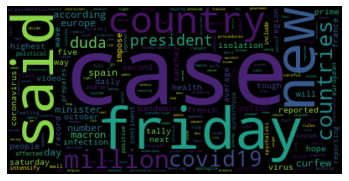

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(europe_covid_text_cleaned)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


def print_freq_words(num):
    text_words = list(wordcloud.words_.keys())[:num]
    text = f'the {num} most frequented words are: '
    print(text + ', '.join(text_words))

print_freq_words(5)

# Exercise 5

In [32]:
from gensim.summarization import summarize

print(summarize(europe_covid_text, word_count=250))

European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class.
Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.
"The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday.
The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October.
French President Emmanuel Macron warned Friday that his country needs to live with the vir